# Quantum Fourier Transform 

### Theory

QFT is defined as

$ \large{QFT:|x> = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} \omega_{x}^{k}|k>}$

where $\omega_{x}^{k}$ is $N^{th}$ ($N = 2^{n}$) root of unity: $e^{\frac{2\pi i}{2^{n}}}$.

- QFT: $F_{N} =  \frac{1}{\sqrt{N}} \begin{bmatrix}
    1  &         1   &        1       &     1          &   \cdots   &  1   \\
    1  &  \omega_{n} & \omega_{n}^{2} & \omega_{n}^{3} &   \cdots   & \omega_{n} ^{N-1}\\
    1  &  \omega_{n}^{2} & \omega_{n}^{4} & \omega_{n}^{6} &   \cdots   & \omega_{n} ^{2(N-1)}\\
    1  &  \omega_{n}^{3} & \omega_{n}^{6} & \omega_{n}^{9} &   \cdots   & \omega_{n} ^{3(N-1)}\\
   \vdots  & \vdots  & \vdots         & \vdots         &    \dots   & \vdots \\
   1  &  \omega_{n}^{(N-1)} & \omega_{n}^{2(N-1)} & \omega_{n}^{3(N-1)} &   \cdots   & \omega_{n} ^{(N-1((N-1)}\\
\end{bmatrix}$





---------

### Single qubit QFT

For single qubit circuit ($n = 1, N = 2^{1} = 2)$


$\omega_n = e^{\frac{2\pi i}{2^{n}}} = -1$.

QFT = $\frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}$

----------
How is state |0> transformed ?

$QFT|0> = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \begin{bmatrix}
    1   \\
    0
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    1
\end{bmatrix} = \frac{1}{\sqrt{2}} (|0> + |1>)$

----------
How is state |1> transformed ?

$QFT|1> = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \begin{bmatrix}
    0   \\
    1
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    -1
\end{bmatrix} = \frac{1}{\sqrt{2}} (|0> - |1>)$

---------------
How is state $c_1|0> + c_2|1>$ transformed?

$QFT(c_1|0> + c_2|1>) = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \begin{bmatrix}
    c_1   \\
    c_2
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    c_1 + c_2   \\
    c_2 - c1
\end{bmatrix} = \frac{1}{\sqrt{2}} ((c_1 + c_2)|0> - (c_2 - c1)|1>)$




How to realize the quantum circuit?

It is Hadamard gate !

### Quantum Circuit - 1 qubit QFT

In [10]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [19]:
def qft_1():
    n=1
    qc = QuantumCircuit()
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    qc.add_register(q)
    qc.add_register(c)

    qc.h(q[0])
    return qc,q,c

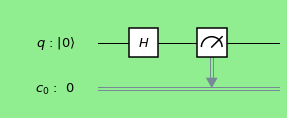

In [20]:
qc,q,c = qft_1()
qc.measure(q[0], c[0])

# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

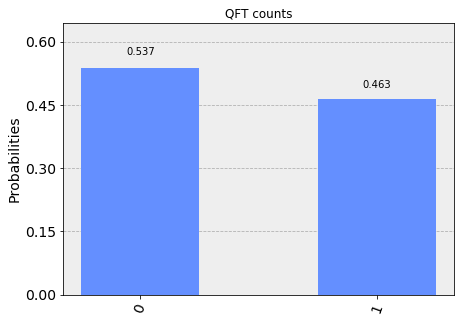

In [21]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='QFT counts')

In [23]:
from qiskit.providers.aer import UnitarySimulator
qc,q,c = qft_1()
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print( unitary)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


### Two qubit QFT

For two qubit circuit, ($n =2, N = 2^{2} = 4)$


$\omega_{n} = e^{\frac{2\pi i}{2^{n}}} = i$

$QFT_2 = \frac{1}{{2}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix}$

----------
How is state |00> transformed ?

$QFT_2|00> = \frac{1}{{2}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix} \begin{bmatrix}
    1   \\
    0  \\
    0  \\
    0  \\
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1   \\
    1   \\
    1  \\
    1
\end{bmatrix} = \frac{1}{{2}} (|00> + |10> + |01> + |11>)$


---------------
How is state $c_1|00> + c_2|10> + c_3 |01> + c_4 |11> $ transformed?

$QFT_2|(c_1|00> + c_2|10> + c_3 |01> + c_4 |11>) = \frac{1}{{2}} \begin{bmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{bmatrix} \begin{bmatrix}
    c_1   \\
    c_2  \\
    c_3  \\
    c_4  \\
\end{bmatrix} = \frac{1}{{2}} \begin{bmatrix}
    c_1 +c_2 +c_3 +c_4   \\
    c_1 +ic_2 -c_3 -ic_4   \\
    c_1 -c_2 +c_3 -c_4  \\
    c_1 -ic_2 -c_3 +ic_4
\end{bmatrix} = \frac{1}{{2}} (d_1|00> + d_2|10> + d_3|01> + d_4|11>)$




How to realize the quantum circuit?

------------

$H \otimes I = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \otimes \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix} $

-----------
$C_{u1} = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & i
\end{pmatrix}$


-------------

$I \otimes H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix} \otimes \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 & 0 & 0\\
1 & -1 & 0 & 0\\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{bmatrix} $

-------------

SWAP = $\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}$

-----------

$QFT_2 = (H \otimes I) \times C_{u1} \times (I \otimes H) \times SWAP $

$ = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix}\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & i
\end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 & 0 & 0\\
1 & -1 & 0 & 0\\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{pmatrix} \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}$

= $\frac{1}{{2}} \begin{pmatrix}
    1  &   1  &  1  &   1\\
    1  &   i  &  -1  &  -i\\
    1  &   -1  &  1  &   -1\\
    1  &  -i  &  -1  &  i
\end{pmatrix}$







Numpy check:

In [46]:
HI = np.array([[1,0,1,0],[0,1,0,1],[1,0,-1,0],[0,1,0,-1]])
CU1 = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,0.+1.j]])
IH = np.array([[1,1,0,0],[1,-1,0,0],[0,0,1,1],[0,0,1,-1]])
SWAP = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])

In [49]:
np.dot(HI,np.dot(CU1,np.dot(IH,SWAP)))

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.+1.j, -1.+0.j,  0.-1.j],
       [ 1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.+0.j,  0.+1.j]])

-  Quantum Circuit Reliazation

In [25]:
import numpy as np

In [54]:
def qft_2():
    n=2
    qc = QuantumCircuit()
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    qc.add_register(q)
    qc.add_register(c)

    qc.h(q[1])
    qc.cu1(np.pi / 2, q[0], q[1])
    qc.h(q[0])
    qc.swap(q[0], q[1])
    return qc,q,c


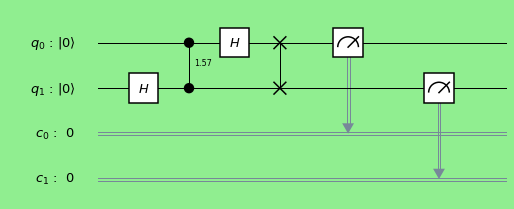

In [56]:
qc,q,c = qft_2()

qc.measure(q, c)
# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

Manual approach:

------------

- Initial state: |00>
- After Hadamard Gate on qubit 2 : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|01> $
- After phase shift Gate : $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|01> $
- After Hadamard Gate on qubit 1 : $\frac{1}{{2}}|00> + \frac{1}{{2}}|10>  +  \frac{1}{{2}}|01> - \frac{1}{{2}}|11>$
- After SWAP:  $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> - \frac{1}{{2}}|11>$


- Simulation

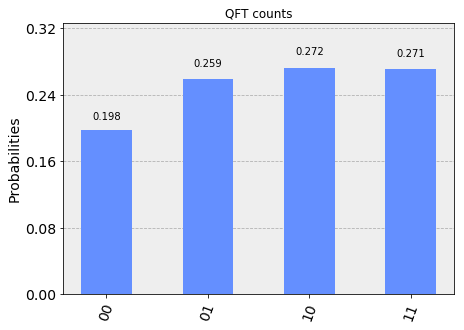

In [57]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='QFT counts')

- Unitary representation in product space

In [58]:
from qiskit.providers.aer import UnitarySimulator
qc,q,c = qft_2()
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print( unitary)

[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0.5+0.j   0. +0.5j -0.5+0.j   0. -0.5j]
 [ 0.5+0.j  -0.5+0.j   0.5+0.j  -0.5+0.j ]
 [ 0.5+0.j   0. -0.5j -0.5+0.j   0. +0.5j]]


-----------

### QFT -3 qubit

In [70]:
def qft_3():
    n = 3
    qc = QuantumCircuit()
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    qc.add_register(q)
    qc.add_register(c)

    qc.h(q[2])
    qc.cu1(np.pi / 2, q[1], q[2])
    qc.h(q[1])
    qc.cu1(np.pi / 4, q[0], q[2])
    qc.cu1(np.pi / 2, q[0], q[1])
    qc.h(q[0])
    
    qc.swap(q[0], q[2])
   
    return qc,q,c

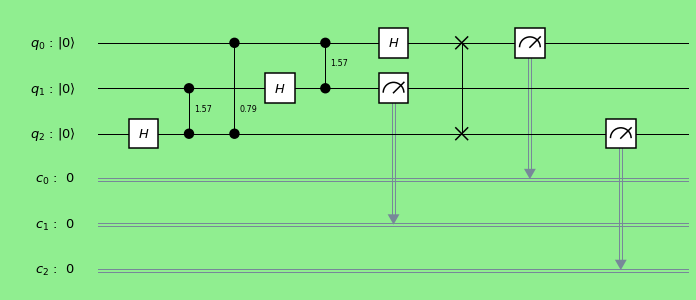

In [71]:
qc,q,c = qft_3()
qc.measure(q,c)
# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

Manual Approach:

- Initial state: |000>
- After Hadamard Gate on 3rd qubit : $\frac{1}{\sqrt{2}}(|000> + |001>) $
- After CU1 gate on qubit (2,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
- After CU1 gate on qubit (1,3) : $\frac{1}{\sqrt{2}}(|000> + |001>) $
- After Hadamard Gate on qubit 2 : $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
- After CU1 gate on qubit (0,1): $\frac{1}{{2}}(|000> + |010> +  |001> -|011> )$
- After Hadamard Gate on qubit 3 : $\frac{1}{2\sqrt{2}}(|000> + |001> +  |010> + |011> +  |000> - |001> - |010> + |011)$

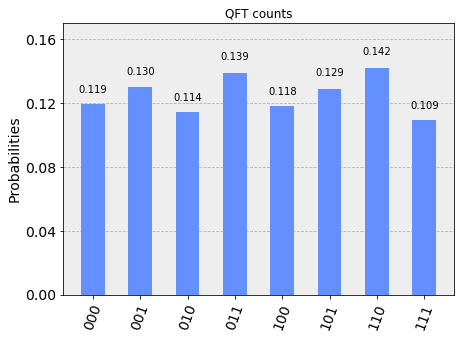

In [72]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='QFT counts')

In [68]:
from qiskit.providers.aer import UnitarySimulator
qc,q,c = qft_3()
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print( unitary)

[[ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.35355339+0.j          0.25      +0.25j        0.        +0.35355339j
  -0.25      +0.25j       -0.35355339+0.j         -0.25      -0.25j
   0.        -0.35355339j  0.25      -0.25j      ]
 [ 0.35355339+0.j          0.        +0.35355339j -0.35355339+0.j
   0.        -0.35355339j  0.35355339+0.j          0.        +0.35355339j
  -0.35355339+0.j          0.        -0.35355339j]
 [ 0.35355339+0.j         -0.25      +0.25j        0.        -0.35355339j
   0.25      +0.25j       -0.35355339+0.j          0.25      -0.25j
   0.        +0.35355339j -0.25      -0.25j      ]
 [ 0.35355339+0.j         -0.35355339+0.j          0.35355339+0.j
  -0.35355339+0.j          0.35355339+0.j         -0.35355339+0.j
   0.35355339+0.j         -0.35355339+0.j        ]
 [ 0.35355339+0.j         -0.25      -0.25j        0.    

### QFT - 4 qubit

In [61]:
def qft_4():
    n = 4
    qc = QuantumCircuit()
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')

    qc.add_register(q)
    qc.add_register(c)

    qc.h(q[3])
    qc.cu1(np.pi / 2, q[2], q[3])
    qc.h(q[2])
    qc.cu1(np.pi / 4, q[1], q[3])
    qc.cu1(np.pi / 2, q[1], q[2])
    qc.h(q[1])
    qc.cu1(np.pi / 8, q[0], q[3])
    qc.cu1(np.pi / 4, q[0], q[2])
    qc.cu1(np.pi / 2, q[0], q[1])
    qc.h(q[0])
    qc.swap(q[0], q[3])
    qc.swap(q[1], q[2])
    
    
    return qc,q,c

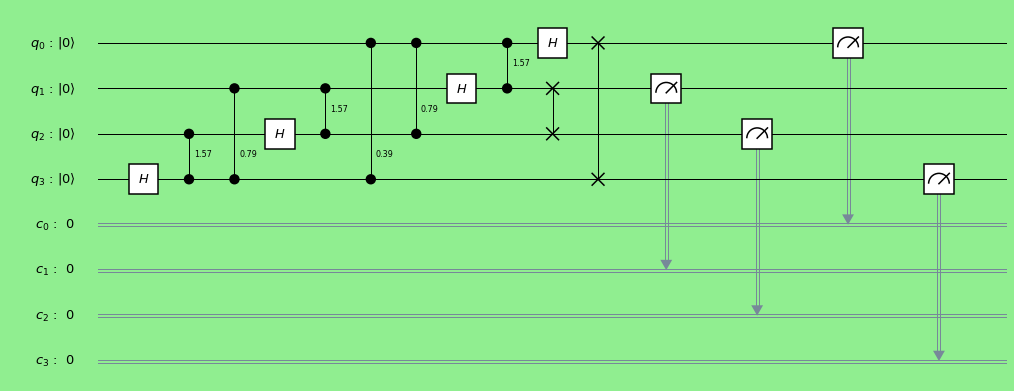

In [62]:
qc,q,c = qft_4()
qc.measure(q,c)
# Change the background color in mpl
style = {'backgroundcolor': 'lightgreen'}
qc.draw(output='mpl', style = style)

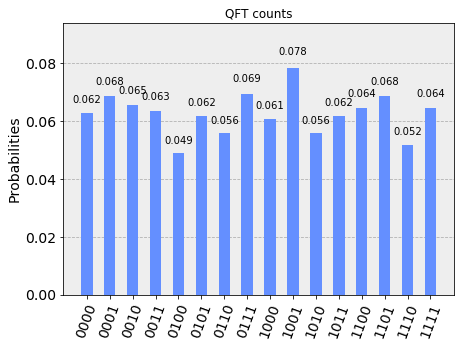

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='QFT counts')

- Generate the Unitary matrix

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.providers.aer import UnitarySimulator

In [4]:
qc = qft_circuit(4)    
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')
# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print( unitary)

[[ 0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j        ]
 [ 0.25      +0.j          0.23096988+0.09567086j  0.1767767 +0.1767767j
   0.09567086+0.23096988j  0.        +0.25j       -0.09567086+0.23096988j
  -0.1767767 +0.1767767j  -0.23096988+0.09567086j -0.25      +0.j
  -0.23096988-0.09567086j -0.1767767 -0.1767767j  -0.09567086-0.23096988j
   0.        -0.25j        0.09567086-0.23096988j  0.1767767 -0.1767767j
   0.23096988-0.09567086j]
 [ 0.25      +0.j          0.1767767 +0.1767767j   0.        +0.25j
  -0.1767767 +0.1767767j  -0.25      +0.j         -0.1767767 -0.1767767j
   0.        -0.25j        0.1767767 -0.1767767j   0.25      +0.j
   0.1767767 +0.1767767j   0.        +0.25j      

### References
-----
1. https://www.youtube.com/watch?v=bntew-yoMzk 